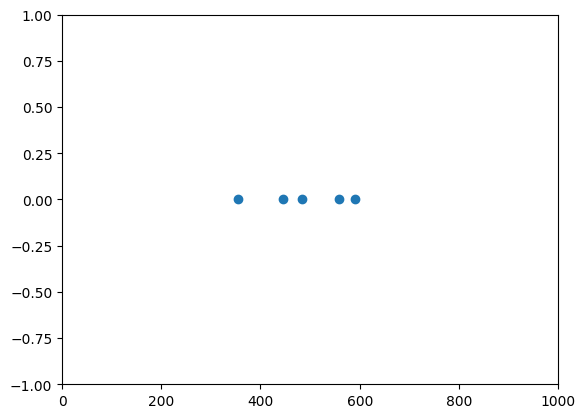

[590.4951947689939, 558.2434246972974, 445.18110181741133, 484.6297931394335, 355.5789942831418]


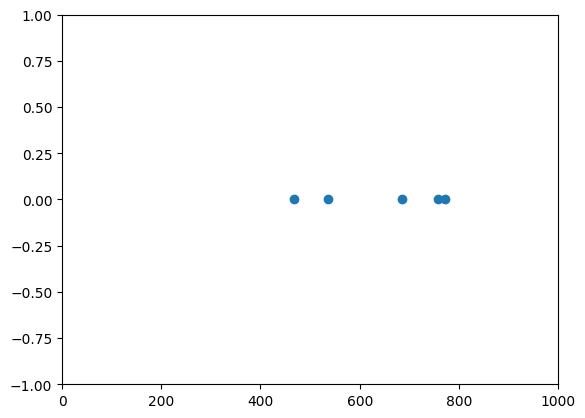

[771.4855843069815, 758.2434246972974, 535.543305452234, 684.6297931394336, 466.7369828494255]


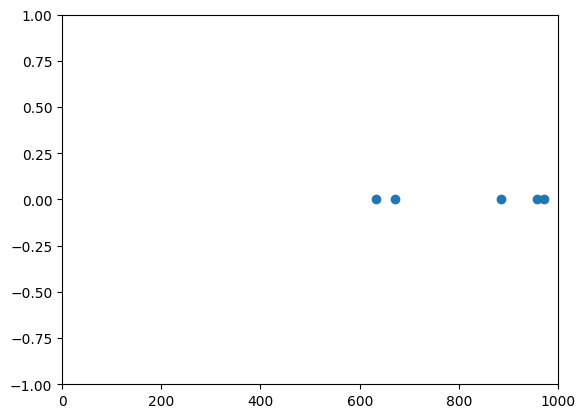

[971.4855843069815, 958.2434246972974, 671.086610904468, 884.6297931394336, 633.473965698851]


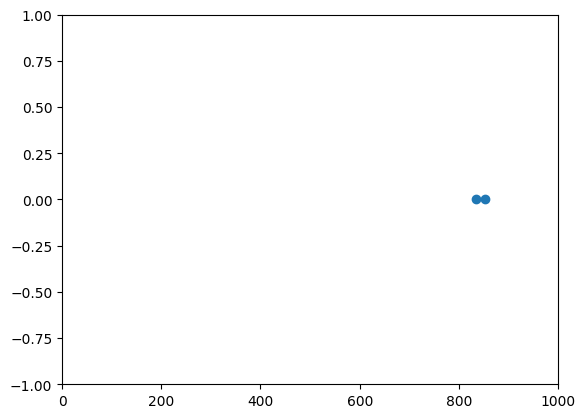

[1171.4855843069815, 1158.2434246972975, 851.8110181741133, 1084.6297931394336, 833.473965698851]


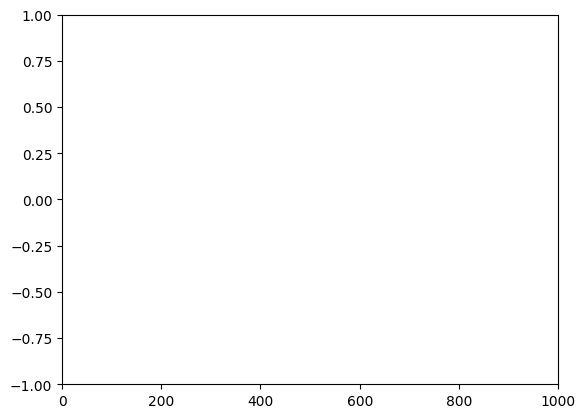

[1371.4855843069815, 1358.2434246972975, 1051.8110181741133, 1284.6297931394336, 1033.4739656988509]


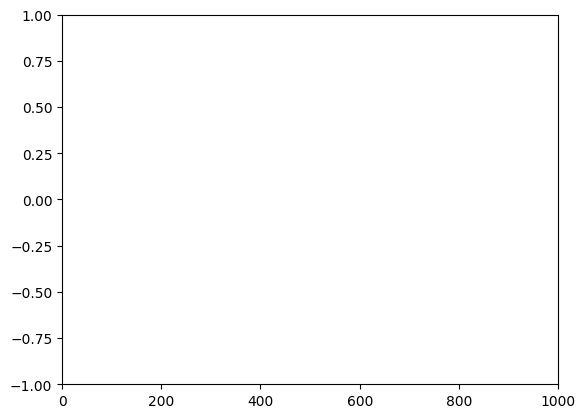

[1571.4855843069815, 1558.2434246972975, 1251.8110181741133, 1484.6297931394336, 1233.4739656988509]


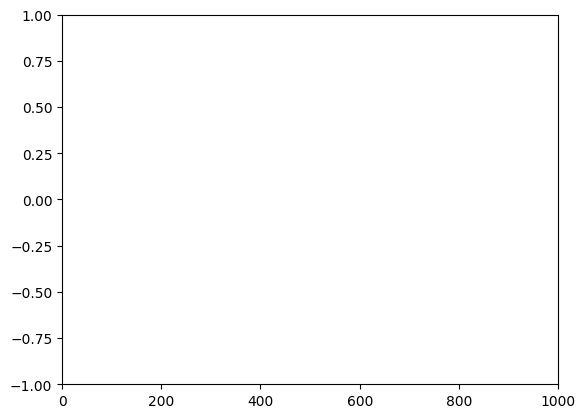

[1771.4855843069815, 1758.2434246972975, 1451.8110181741133, 1684.6297931394336, 1433.4739656988509]


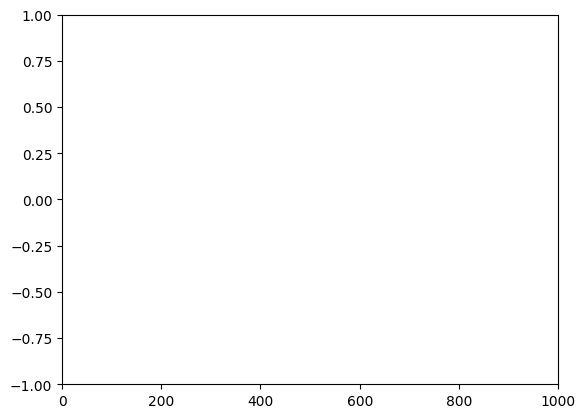

[1971.4855843069815, 1958.2434246972975, 1651.8110181741133, 1884.6297931394336, 1633.4739656988509]


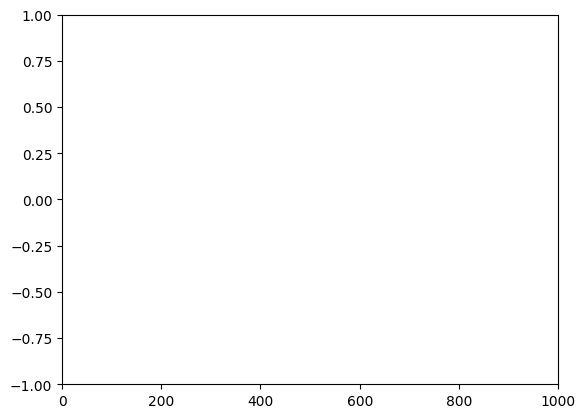

[2171.4855843069818, 2158.2434246972975, 1851.8110181741133, 2084.629793139434, 1833.4739656988509]


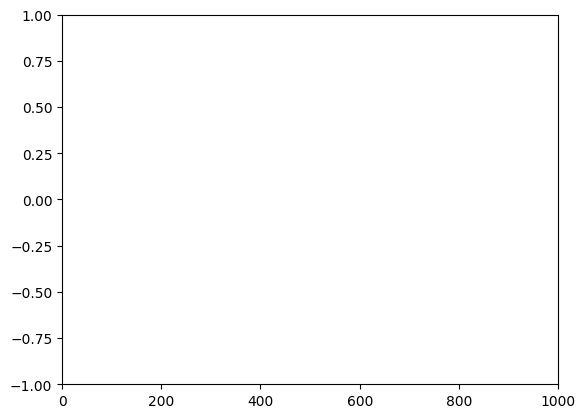

[2371.4855843069818, 2358.2434246972975, 2051.811018174113, 2284.629793139434, 2033.4739656988509]


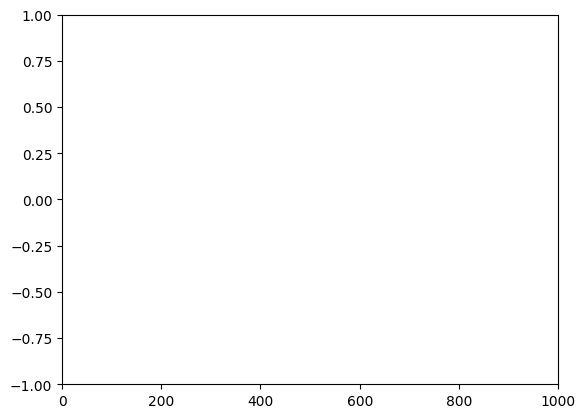

[2571.4855843069818, 2558.2434246972975, 2251.811018174113, 2484.629793139434, 2233.473965698851]


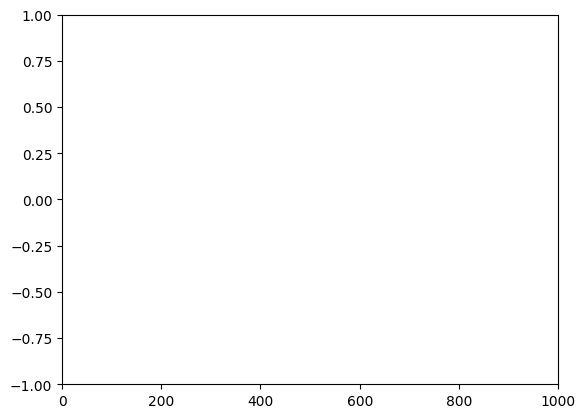

[2771.4855843069818, 2758.2434246972975, 2451.811018174113, 2684.629793139434, 2433.473965698851]


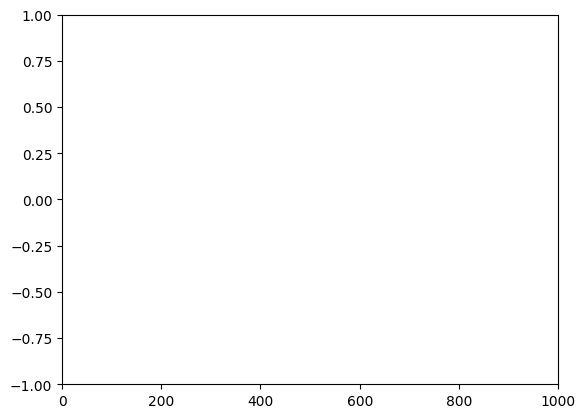

[2971.4855843069818, 2958.2434246972975, 2651.811018174113, 2884.629793139434, 2633.473965698851]


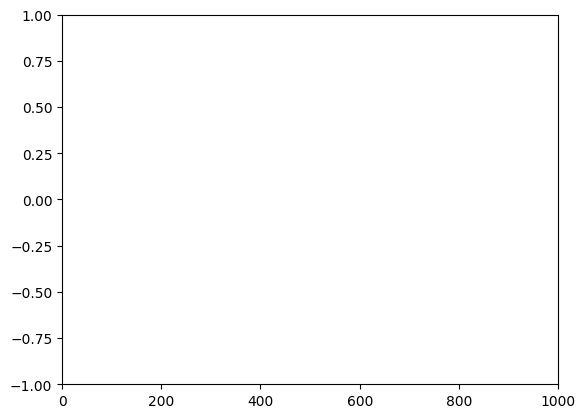

[3171.4855843069818, 3158.2434246972975, 2851.811018174113, 3084.629793139434, 2833.473965698851]


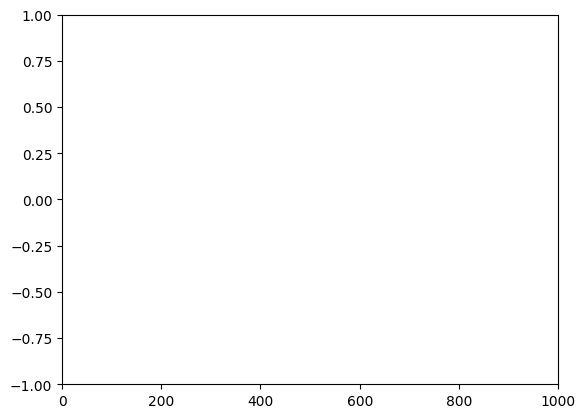

[3371.4855843069818, 3358.2434246972975, 3051.811018174113, 3284.629793139434, 3033.473965698851]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, position, speed, max_speed, acceleration, deceleration, safe_distance):
        self.position = position
        self.speed = speed
        self.max_speed = max_speed
        self.acceleration = acceleration
        self.deceleration = deceleration
        self.safe_distance = safe_distance

    def update(self, dt):
        self.speed = min(self.speed + self.acceleration * dt, self.max_speed)
        self.position += self.speed * dt

class TrafficSimulation:
    def __init__(self, road_length, num_vehicles, max_speed, safe_distance):
        self.road_length = road_length
        self.safe_distance = safe_distance
        self.vehicles = [Vehicle(road_length/2 - i * safe_distance, 0, max_speed, (1-np.random.rand()) * max_speed, (1-np.random.rand()) * max_speed, safe_distance) for i in range(num_vehicles)]

    def update(self, dt):
        for vehicle in self.vehicles:
            vehicle.update(dt)
        for i in range(0,len(self.vehicles)-1,-1):
            if (self.vehicles[i-1].position - self.vehicles[i].position) < self.safe_distance:
                self.vehicles[i].position = self.vehicles[i-1].position - self.safe_distance


    def visualize(self):
        positions = [vehicle.position for vehicle in self.vehicles]
        plt.plot(positions, np.zeros_like(positions), 'o')
        plt.xlim(0, self.road_length)
        plt.ylim(-1, 1)
        plt.show()

# Simulation parameters
road_length = 1000
num_vehicles = 5
max_speed = 200
simulation_time = 15
dt = 1
safe_distance = 50


# Create simulation
simulation = TrafficSimulation(road_length, num_vehicles, max_speed, safe_distance)
                               
# Run simulation loop
for _ in range(int(simulation_time / dt)):
    simulation.update(dt)
    simulation.visualize()
    print([vehicle.position for vehicle in simulation.vehicles])